R Code pulled from https://www.statmethods.net/advgraphs/ggplot2.html

In [14]:
# ggplot2 examples
library(ggplot2) 
library(dplyr)

In [12]:
install.packages('dplyr')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [13]:
conda install -c r r-essentials

ERROR: Error in parse(text = x, srcfile = src): <text>:1:7: unexpected symbol
1: conda install
          ^


'data.frame':	17568 obs. of  3 variables:
 $ steps   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ date    : Factor w/ 61 levels "2012-10-01","2012-10-02",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ interval: int  0 5 10 15 20 25 30 35 40 45 ...


Date,Steps
<fct>,<int>
2012-10-01,NA
2012-10-02,126
2012-10-03,11352
2012-10-04,12116
2012-10-05,13294
2012-10-06,15420
2012-10-07,11015
2012-10-08,NA
2012-10-09,12811


[1] 10766.19

[1] 10765

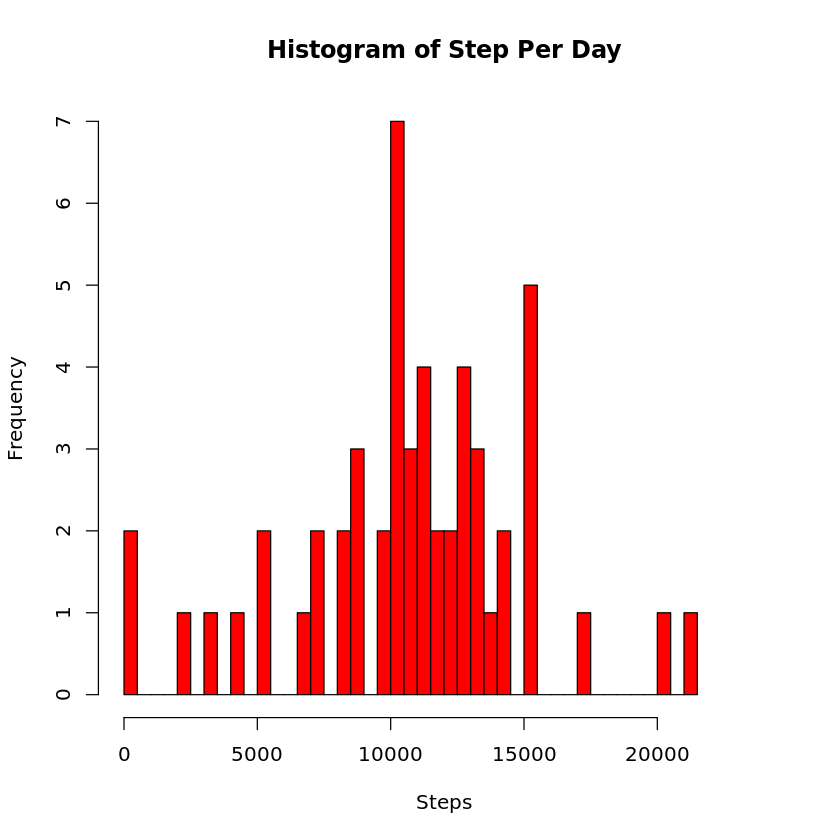

In [6]:
download.file('https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip','data.zip',method = "auto", quiet=FALSE)

unzip("data.zip")

my_data <- read.csv("activity.csv")

str(my_data)

SPD <- aggregate(my_data$steps, list(my_data$date), FUN=sum)
colnames(SPD) <- c("Date", "Steps")
SPD

hist(SPD$"Steps",col="red",xlab="Steps",main="Histogram of Step Per Day",breaks = 61,xlim =c(0,24000))

mean_activity <- mean(SPD$Steps, na.rm=TRUE)
median_activity <- median(SPD$Steps, na.rm=TRUE)

mean_activity
median_activity

SPT <- aggregate(steps~interval,data= my_data,FUN=mean, na.action=na.omit)
SPT$time <- SPT$interval/100




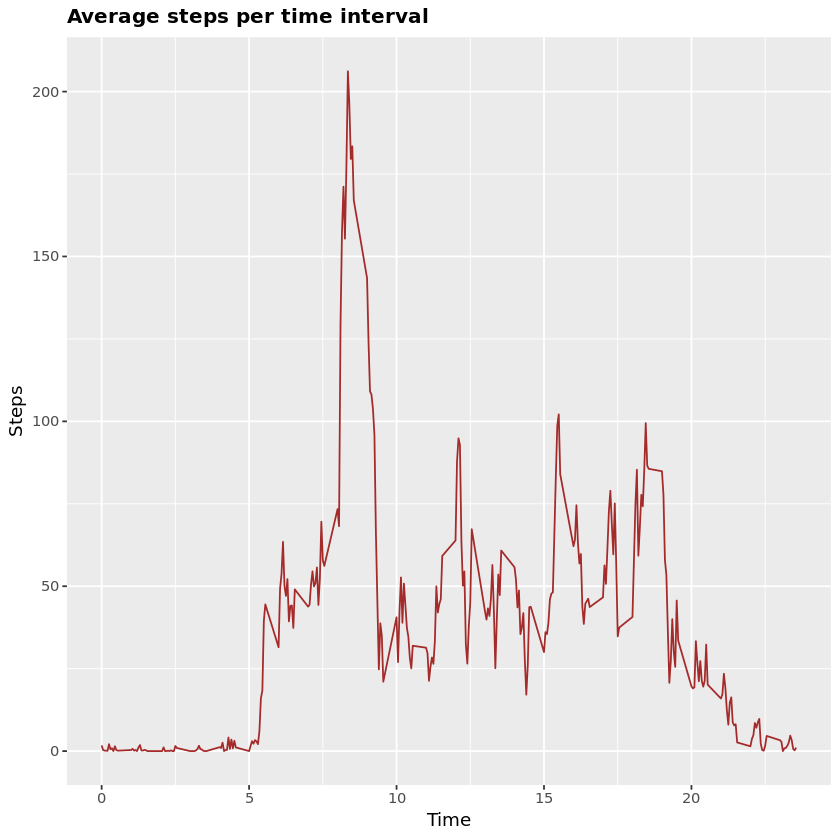

In [9]:
h <- ggplot(SPT, aes(time, steps))
h+geom_line(col="brown")+ggtitle("Average steps per time interval")+xlab("Time")+ylab("Steps")+theme(plot.title = element_text(face="bold", size=12))

In [15]:
ST <- tbl_df(SPT)
# find the column
ST %>% select(time, steps) %>% filter(steps==max(ST$steps))

time,steps
<dbl>,<dbl>
8.35,206.1698


In [18]:
ACT <- tbl_df(my_data)
# find the column
ACT %>% filter(is.na(steps)) %>% summarize(missing_values = n())

missing_values
<int>
2304


In [19]:
my_data$CompleteSteps <- ifelse(is.na(my_data$steps), round(SPT$steps[match(my_data$interval, SPT$interval)],0), my_data$steps)

In [21]:
activityFull <- data.frame(steps=my_data$CompleteSteps, interval=my_data$interval, date=my_data$date)
# see first 10 values of the new dataset
head(activityFull, n=10)

,steps,interval,date
,<dbl>,<int>,<fct>
1,2,0,2012-10-01
2,0,5,2012-10-01
3,0,10,2012-10-01
4,0,15,2012-10-01
5,0,20,2012-10-01
6,2,25,2012-10-01
7,1,30,2012-10-01
8,1,35,2012-10-01
9,0,40,2012-10-01


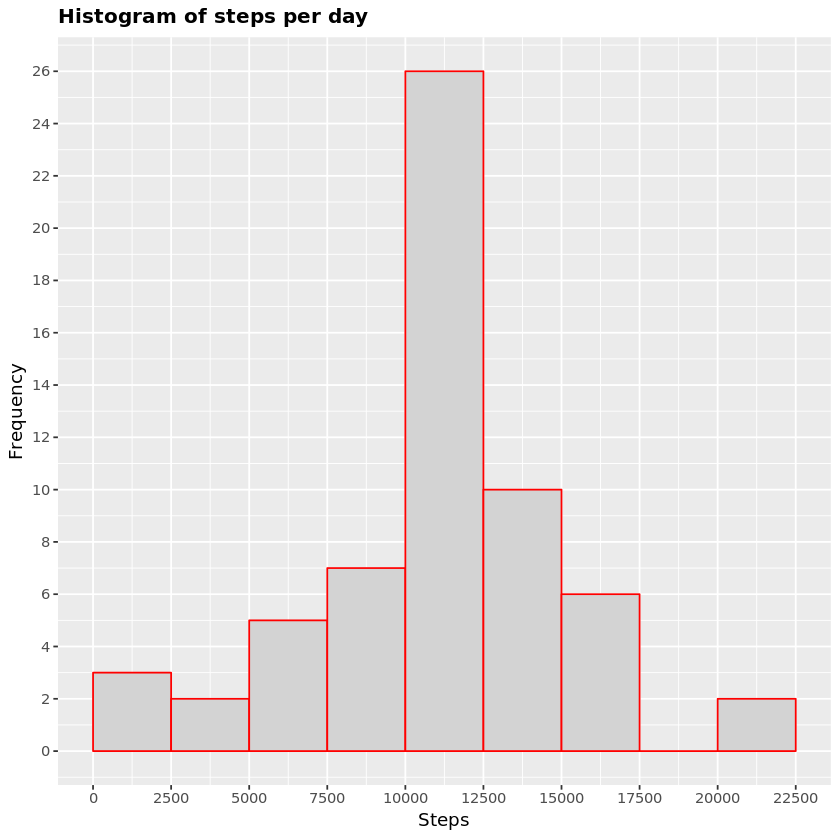

In [23]:
StepsPerDayFull <- aggregate(activityFull$steps, list(activityFull$date), FUN=sum)
colnames(StepsPerDayFull) <- c("Date", "Steps")
# draw the histogram
g <- ggplot(StepsPerDayFull, aes(Steps))
g+geom_histogram(boundary=0, binwidth=2500, col="red", fill="lightgrey")+ggtitle("Histogram of steps per day")+xlab("Steps")+ylab("Frequency")+theme(plot.title = element_text(face="bold", size=12))+scale_x_continuous(breaks=seq(0,25000,2500))+scale_y_continuous(breaks=seq(0,26,2))

In [24]:
mean(StepsPerDayFull$Steps)

[1] 10765.64

In [25]:
median(StepsPerDayFull$Steps)

[1] 10762

In [26]:
activityFull$RealDate <- as.Date(activityFull$date, format = "%Y-%m-%d")
# create a variable with weekdays name
activityFull$weekday <- weekdays(activityFull$RealDate)
# create a new variable indicating weekday or weekend
activityFull$DayType <- ifelse(activityFull$weekday=='Saturday' | activityFull$weekday=='Sunday', 'weekend','weekday')
# see first 10 values
head(activityFull, n=10)

,steps,interval,date,RealDate,weekday,DayType
,<dbl>,<int>,<fct>,<date>,<chr>,<chr>
1,2,0,2012-10-01,2012-10-01,Monday,weekday
2,0,5,2012-10-01,2012-10-01,Monday,weekday
3,0,10,2012-10-01,2012-10-01,Monday,weekday
4,0,15,2012-10-01,2012-10-01,Monday,weekday
5,0,20,2012-10-01,2012-10-01,Monday,weekday
6,2,25,2012-10-01,2012-10-01,Monday,weekday
7,1,30,2012-10-01,2012-10-01,Monday,weekday
8,1,35,2012-10-01,2012-10-01,Monday,weekday
9,0,40,2012-10-01,2012-10-01,Monday,weekday


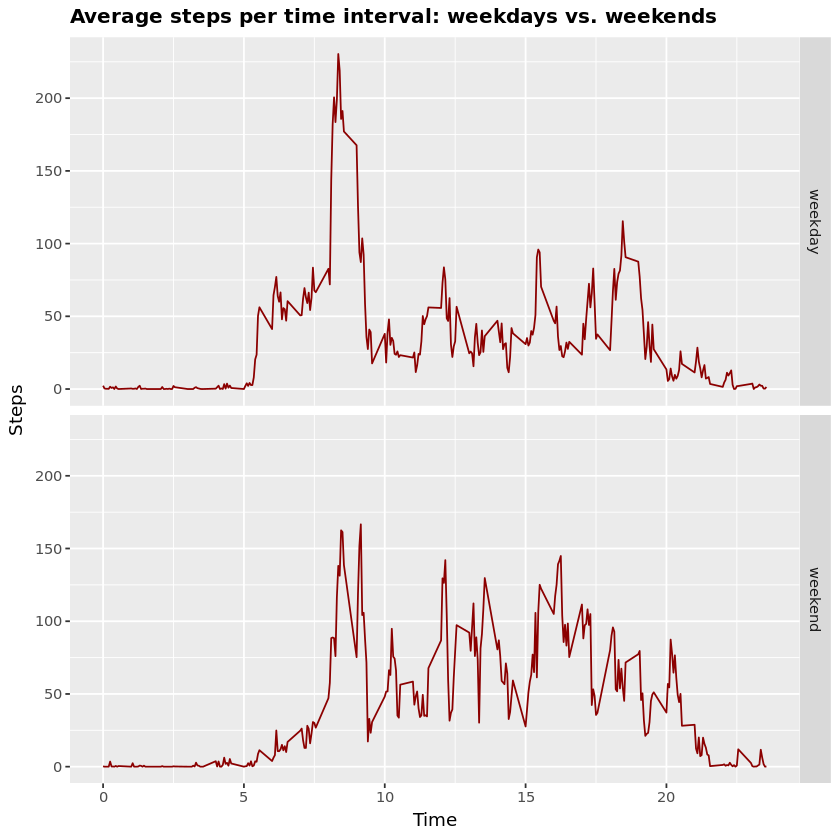

In [28]:
StepsPerTimeDT <- aggregate(steps~interval+DayType,data=activityFull,FUN=mean,na.action=na.omit)
# variable time (more comprensible for the graph axis)
StepsPerTimeDT$time <- SPT$interval/100
# draw the line plot
j <- ggplot(StepsPerTimeDT, aes(time, steps))
j+geom_line(col="darkred")+ggtitle("Average steps per time interval: weekdays vs. weekends")+xlab("Time")+ylab("Steps")+theme(plot.title = element_text(face="bold", size=12))+facet_grid(DayType ~ .)